In [1]:
import pandas as pd

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


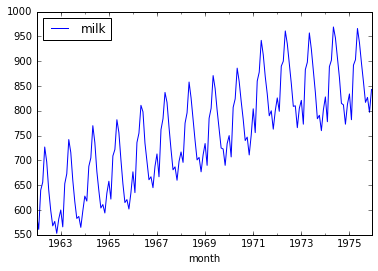

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  
milk.plot(kind='line')

In [5]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221237,
 0.62742670860303429,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [6]:
import calendar

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце позволяет функция monthrange из пакета calendar. Используйте её для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после запятой.

In [29]:
per_day = []


In [30]:
for x in range (0,milk.milk.count()):
    per_day.append(1.0*milk.milk.values[x]/calendar.monthrange(milk.index[x].year,milk.index[x].month)[1])

In [31]:
import numpy as np

In [32]:
a = np.array(per_day)

In [33]:
milk['per_day'] = a

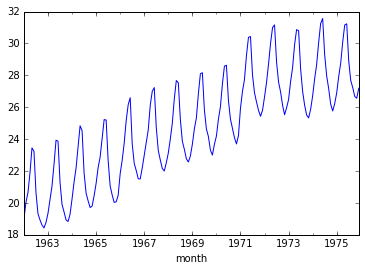

In [34]:
milk['per_day'].plot(kind='line')

In [35]:
d = milk.milk.sum()

In [36]:
c = milk.per_day.sum()

In [37]:
c

4166.326661899464

In [38]:
milk.daily_diff1 = milk.per_day - milk.per_day.shift(1)

In [39]:
milk.daily_diff12 = milk.per_day - milk.per_day.shift(12)

In [40]:
sm.tsa.stattools.adfuller(milk.daily_diff1[~milk.daily_diff1.isnull()])

(-2.759469476228912,
 0.064300546541746717,
 11L,
 155L,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

In [41]:
sm.tsa.stattools.adfuller(milk.daily_diff12[~milk.daily_diff12.isnull()])

(-2.1594860932888076,
 0.22127672658830383,
 12L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [42]:
milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [43]:
sm.tsa.stattools.adfuller(milk.daily_diff12_1[~milk.daily_diff12_1.isnull()])

(-5.4813263347969334,
 2.2808455518036496e-06,
 11L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.905137509892256)

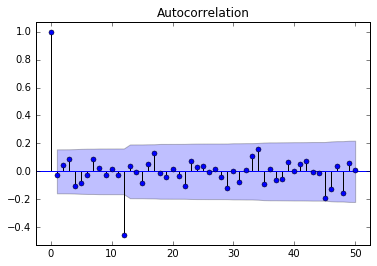

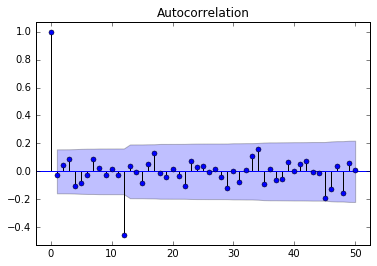

In [44]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff12_1[~milk.daily_diff12_1.isnull()].values.squeeze(), lags=50)

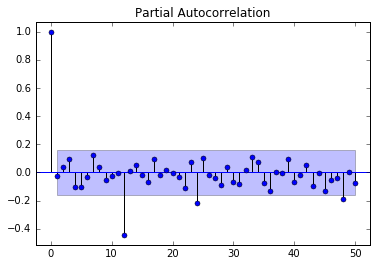

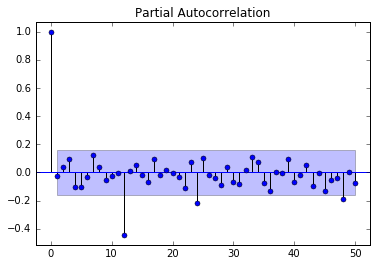

In [45]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1[~milk.daily_diff12_1.isnull()].values.squeeze(), lags=50)